In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import joblib
import warnings
warnings.filterwarnings('ignore')

In [123]:
ASC=pd.read_csv('Advertising.csv')
ASC

,SrNo.,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


We have called the dataset advertising sales channel as ASC.

In [124]:
ASC.columns

Index(['SrNo.', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

There are 5 columns in the dataset.

In [59]:
ASC.shape

(200, 5)

There are 200 rows and 5 columns in dataset.m

In [60]:
ASC.head()

,SrNo.,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


These are first 5 rows of the dataset.

In [61]:
ASC.tail()

,SrNo.,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


These are bottom five  rows of the dataset.

In [62]:
ASC.dtypes

SrNo.          int64
TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

Columnd are of float type

In [63]:
ASC.describe()

,SrNo.,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


There is huge difference between 75% and max value in newspaper,show outliers are present in this column.

#### After looking at the sales column it is clear that this is linear regression problem

## Correlation

In [64]:
ASC.corr()

,SrNo.,TV,radio,newspaper,sales
SrNo.,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


Above gives the correlation between columns.

<AxesSubplot:>

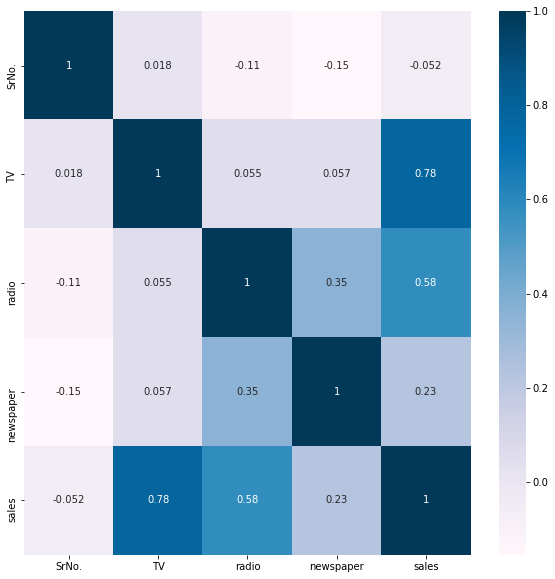

In [65]:
plt.figure(figsize=(10,10))
sns.heatmap(ASC.corr(),annot=True,cmap='PuBu')

In [66]:
ASC.drop('SrNo.',axis=1,inplace=True)

Dropping the column SrNo. , as it will not add any value for data evaluation.

## EDA

### Univariative Analysis

In [67]:
cols=ASC.columns
cols

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

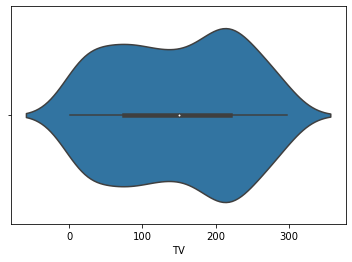

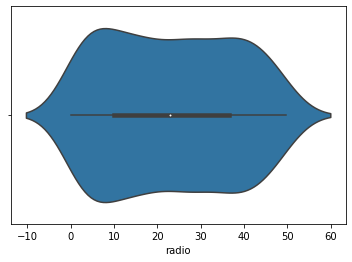

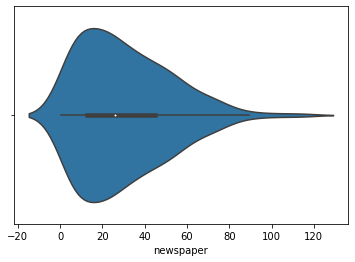

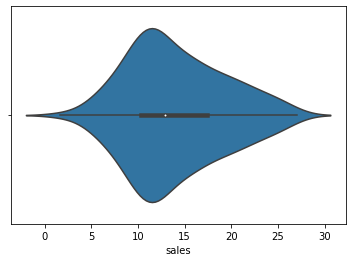

In [68]:
for i in cols:
    sns.violinplot(ASC[i])
    plt.show()

Budget in TV and Radio is informaly distributed.

For newspapper mostly invested amount for advertisng ranges from 0 to 60 $.

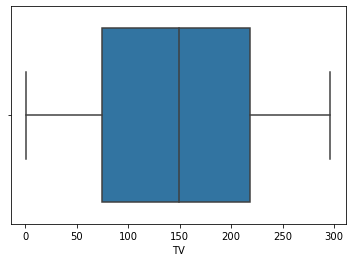

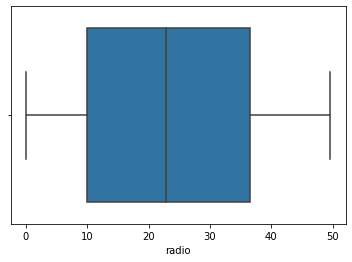

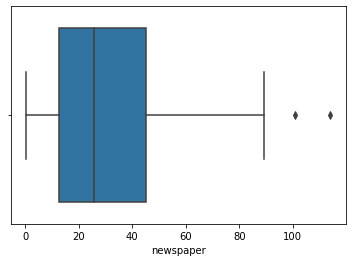

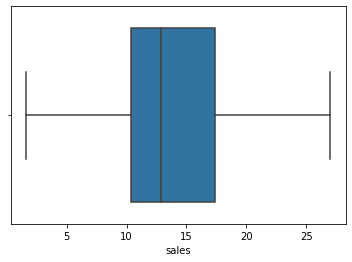

In [69]:
for i in cols:
    sns.boxplot(ASC[i])
    plt.show()

Outliers are present in newspaper column.

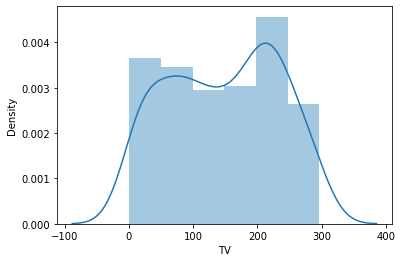

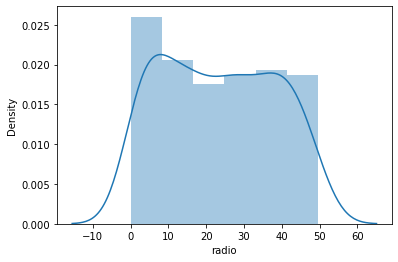

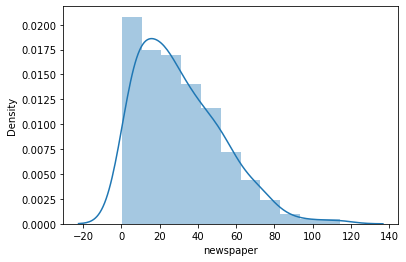

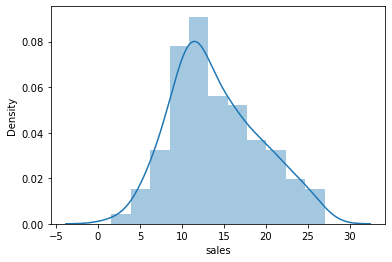

In [70]:
for i in cols:
    sns.distplot(ASC[i])
    plt.show()

Radia nd TV are multiskewed.

Newspaper is right skewed.

Sales is uniformly distributed.

<AxesSubplot:ylabel='Frequency'>

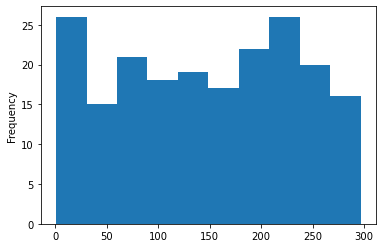

In [186]:
ASC['TV'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

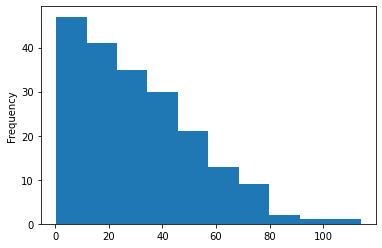

In [187]:
ASC['newspaper'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

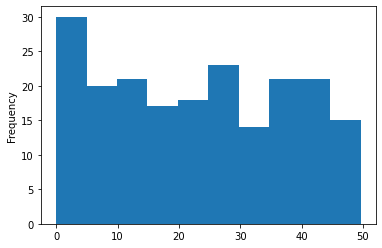

In [188]:
ASC['radio'].plot.hist()

### Biavariate Analysis

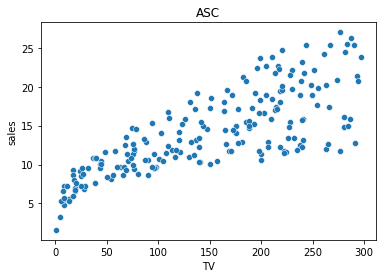

In [71]:
ax=sns.scatterplot(ASC['TV'],ASC['sales'])
ax.set(xlabel='TV',ylabel='sales')
plt.title('ASC')
plt.show()

TV is Positively related to sales.

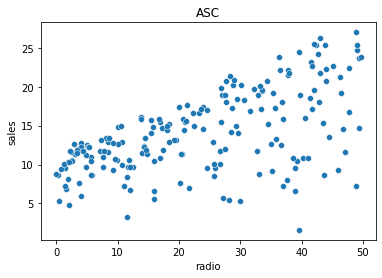

In [72]:
RS=sns.scatterplot(ASC['radio'],ASC['sales'])
RS.set(xlabel='radio',ylabel='sales')
plt.title('ASC')
plt.show()

Sales and Radio are moderatly related.

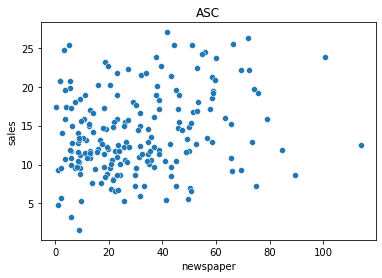

In [73]:
NS=sns.scatterplot(ASC['newspaper'],ASC['sales'])
NS.set(xlabel='newspaper',ylabel='sales')
plt.title('ASC')
plt.show()

Sales and newspaper has very low resistance.

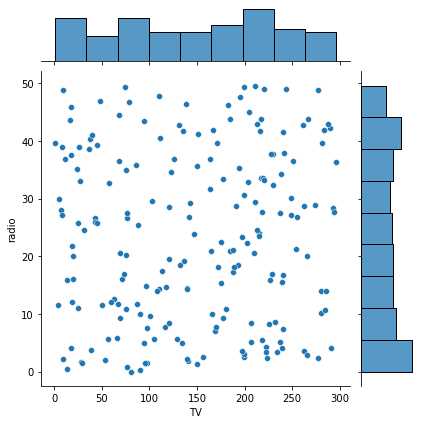

In [74]:
sns.jointplot(x='TV',y='radio',data=ASC)
plt.show()

TV and Radio have null relationship

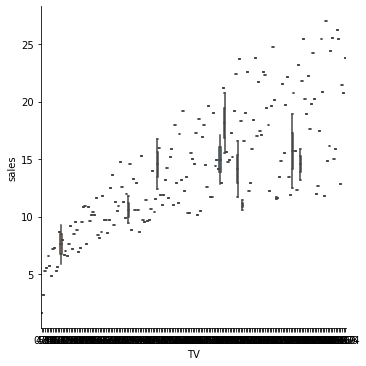

In [190]:
sns.catplot(x='TV',y='sales',data=ASC,kind='box')
plt.show()

In [ ]:
TV and sales are positively related

### Multivariate Analysis

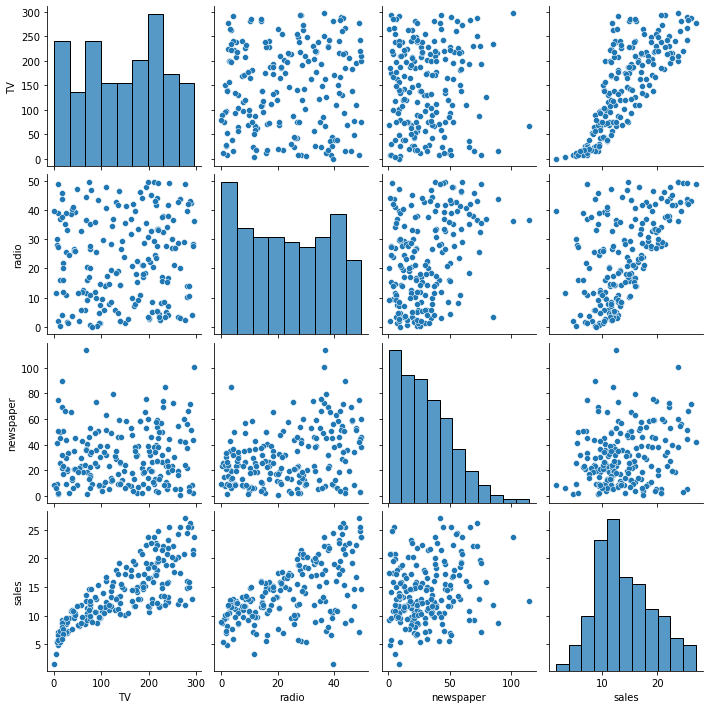

In [75]:
sns.pairplot(ASC)

TV and sales values are more positively related compared to newspaper or radio.

## Removing Ouliers

Outliers from newspaper dataset to be eliminated by qunatile method.

In [111]:
q =ASC['newspaper'].quantile(0.99)
ASC_cleaned = ASC[ASC['newspaper']<q]

<AxesSubplot:xlabel='newspaper'>

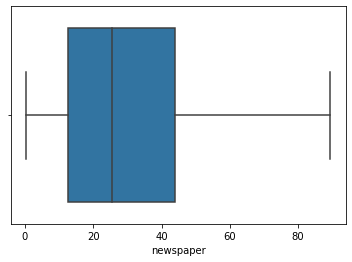

In [112]:
sns.boxplot(ASC_cleaned['newspaper'])

Outliers from newspaper column is cleared by soft caping method.

In [113]:
ASC_cleaned

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


### Data Spliting in X and Y

In [114]:
x=ASC_cleaned.iloc[:,0:-1]

In [115]:
x

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [116]:
y=ASC_cleaned.iloc[:,3:4]

In [117]:
y

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


### Skewness 

In [118]:
x.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
dtype: float64

skewness for newspaper column is high .

In [121]:
x['newspaper']=np.sqrt(x['newspaper'])

In [122]:
x.skew()

TV          -0.082332
radio        0.114842
newspaper   -0.040649
dtype: float64

Now after using sqrt method ,we have cleared skewness from newspaper column.

## MODEL

#### Check the best random_state value for models.

In [127]:
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    predf=LR.predict(x_test)
    ac=r2_score(y_test,predf)
    
    if ac>maxAccu:
        maxAccu=ac
        maxRS=i
        
print('Best r2_score at x is',maxAccu*100,'at random state',maxRS) 

Best r2_score at x is 93.59870808019578 at random state 90


We are getting best r3_score 93.59 at random_state = 90 , so will consider random_state = 90 for all models.

In [128]:
LR.coef_

array([[ 0.04324787,  0.18831643, -0.0687907 ]])

Coef_ for linear regression model.

In [129]:
pred=LR.predict(x_test)

print('the predicted value :',pred)
print('The actual value:',y_test)

the predicted value : [[18.64260215]
 [ 8.98273445]
 [10.07567947]
 [10.034327  ]
 [ 9.12268084]
 [19.72032235]
 [10.70431916]
 [16.79378413]
 [20.70442345]
 [13.59272569]
 [15.42302354]
 [ 9.54294765]
 [23.60288522]
 [20.92778315]
 [20.25261663]
 [ 6.73071773]
 [22.93761672]
 [18.11223382]
 [ 9.11337606]
 [17.01001753]
 [ 9.03589048]
 [10.93478937]
 [11.38209002]
 [11.98014477]
 [ 7.75947414]
 [24.38934515]
 [15.37528963]
 [11.3271354 ]
 [ 9.30338013]
 [18.86768178]
 [20.1605156 ]
 [ 7.99927586]
 [17.80909836]
 [23.65255524]
 [12.02396352]
 [12.47015497]
 [ 8.7806182 ]
 [17.16678803]
 [ 9.72384172]
 [20.42883296]
 [19.01485334]
 [12.46389962]
 [18.84535887]
 [12.01506063]
 [13.96925198]
 [12.46501679]
 [16.16293377]
 [14.3892753 ]
 [17.464029  ]
 [ 7.86542193]
 [12.40650704]
 [17.76758394]
 [ 6.90991537]
 [19.77007555]
 [21.54450438]
 [10.82359762]
 [22.48309627]
 [ 4.77427999]
 [16.84959592]
 [16.22053946]]
The actual value:      sales
193   19.6
46    10.6
138    9.6
157   10.1
44  

In [130]:
print('error')

print('mean absolute error',mean_absolute_error(y_test,pred))
print('mean squared error',mean_squared_error(y_test,pred))


print('root mean squared error',np.sqrt(mean_squared_error(y_test,pred)))

error
mean absolute error 1.4701980684732405
mean squared error 4.430119239658819
root mean squared error 2.104784844030102


### Cross validation of the model:

In [131]:
pred_train=LR.predict(x_train)
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,predf)

for j in range(2,10):
    cv_score=cross_val_score(LR,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'cv {j}the cv score is{cv_mean}accuracy of train score is{Train_accuracy}test accuracy score is{Test_accuracy}')
    print('\n')

cv 2the cv score is0.8894395330464461accuracy of train score is0.902795021871437test accuracy score is0.8771589476162502


cv 3the cv score is0.8889614061129034accuracy of train score is0.902795021871437test accuracy score is0.8771589476162502


cv 4the cv score is0.8883964730592853accuracy of train score is0.902795021871437test accuracy score is0.8771589476162502


cv 5the cv score is0.8857406146589943accuracy of train score is0.902795021871437test accuracy score is0.8771589476162502


cv 6the cv score is0.8868941047683484accuracy of train score is0.902795021871437test accuracy score is0.8771589476162502


cv 7the cv score is0.8840400627916498accuracy of train score is0.902795021871437test accuracy score is0.8771589476162502


cv 8the cv score is0.8882618783932388accuracy of train score is0.902795021871437test accuracy score is0.8771589476162502


cv 9the cv score is0.8812478781412287accuracy of train score is0.902795021871437test accuracy score is0.8771589476162502




We are getting better cross validation mean score at CV=2

#### HYPER PARAMETER TUNNING FOR LINEAR REGRESSION

In [151]:
from sklearn.model_selection import GridSearchCV

model =LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(model,parameters, cv=2)
grid.fit(x_train,y_train)
grid.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': True}

After hyper parameter we have found these are best parameters ---->'copy_X': True, 'fit_intercept': True, 'normalize': True

In [152]:
grid.best_score_

0.8737770822183344

Best score for linear regression model afetr applying hpyer parameter tunning is 87.68%

In [153]:
predx=LR.predict(x_test)
R2_score=r2_score(y_test,predx)

In [154]:
R2_score

0.8771589476162502

R2_score for best parameters using linear regression model is 87.7%

In [155]:
LR.coef_

array([[ 0.04324787,  0.18831643, -0.0687907 ]])

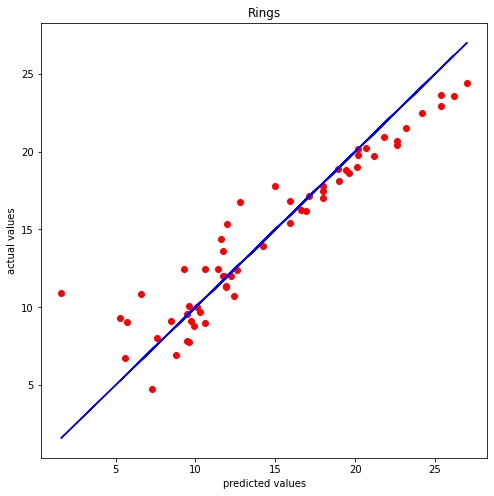

In [156]:
plt.figure(figsize=(8,8))
plt.scatter(x=y_test,y=predx,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('predicted values')
plt.ylabel('actual values')
plt.title('Rings')
plt.show()

Above is plotted linear graph for predicted values v/s actual values for linear regression after using GridSearchCV.

The best R2_score we get for Linear regression is 87.7%.

Coef_values [ 0.04324787,  0.18831643, -0.0687907 ]

## Regularization

In [178]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

### LASSO 

In [179]:
from sklearn.model_selection import GridSearchCV
ls=Lasso()
param= {'alpha':[0.0001,0.001,0.01,0.05,0.1,0.2,0.4,0.6,0.8,1.0,2.0,5.0,10.0,100.0]}

model_cvls=GridSearchCV(estimator=ls,param_grid=param,scoring='neg_mean_absolute_error',cv=4,return_train_score=True,verbose=1)

model_cvls.fit(x_train,y_train)
model_cvls.best_params_

Fitting 4 folds for each of 14 candidates, totalling 56 fits


{'alpha': 0.6}

In [180]:
ls=Lasso(alpha=0.6)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
print('The r2_score using lasso is:',r2_score(y_test,pred_ls))

The r2_score using lasso is: 0.8796154965437905


In [181]:
ls.coef_

array([ 0.04319986,  0.18242865, -0.        ])

After using Lasso method we get r2_score 87.9%

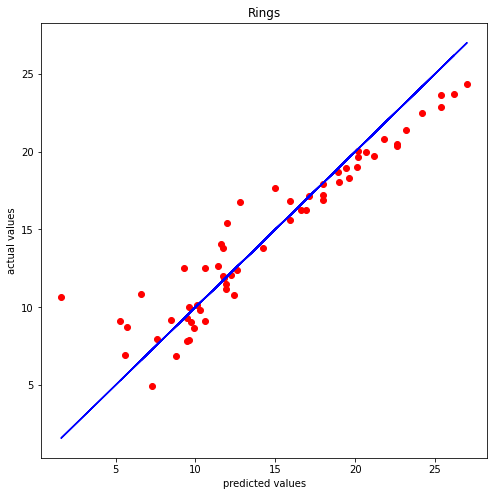

In [183]:
plt.figure(figsize=(8,8))
plt.scatter(x=y_test,y=pred_ls,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('predicted values')
plt.ylabel('actual values')
plt.title('Rings')
plt.show()

### RIDGE

In [172]:
from sklearn.model_selection import GridSearchCV
rd=Ridge()
param= {'alpha':[0.0001,0.001,0.01,0.05,0.1,0.2,0.4,0.6,0.8,1.0,2.0,5.0,10.0,100.0]}

model_cvrd=GridSearchCV(estimator=rd,param_grid=param,scoring='neg_mean_absolute_error',cv=4,return_train_score=True,verbose=1)

model_cvrd.fit(x_train,y_train)

model_cvrd.best_params_

Fitting 4 folds for each of 14 candidates, totalling 56 fits


{'alpha': 100.0}

In [173]:
rd=Ridge(alpha=100.0) #rd=ridge
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
pred_rd=rd.predict(x_test)
print('The r2_score using ridge is:',r2_score(y_test,pred_rd))

The r2_score using ridge is: 0.8777183170488628


In [182]:
rd.coef_

array([[ 0.04325048,  0.18710636, -0.05599577]])

After using Lasso method we get r2_score 87.7%

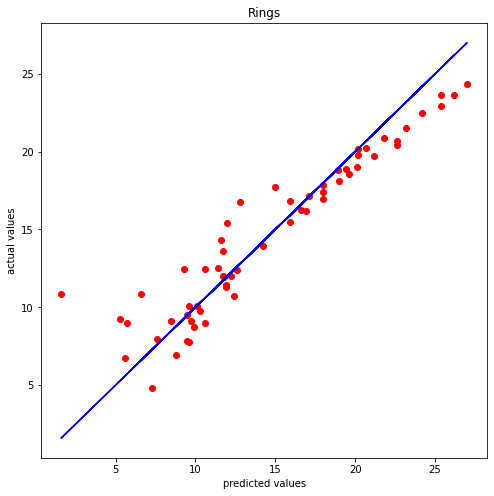

In [184]:
plt.figure(figsize=(8,8))
plt.scatter(x=y_test,y=pred_rd,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('predicted values')
plt.ylabel('actual values')
plt.title('Rings')
plt.show()

### After running all the possible models with hyperparameter tunning we found that lasso is giving us the best r2_score--->87.9%

## JOBLIB

In [185]:
joblib.dump(ls,'ASC.obj')

['ASC.obj']